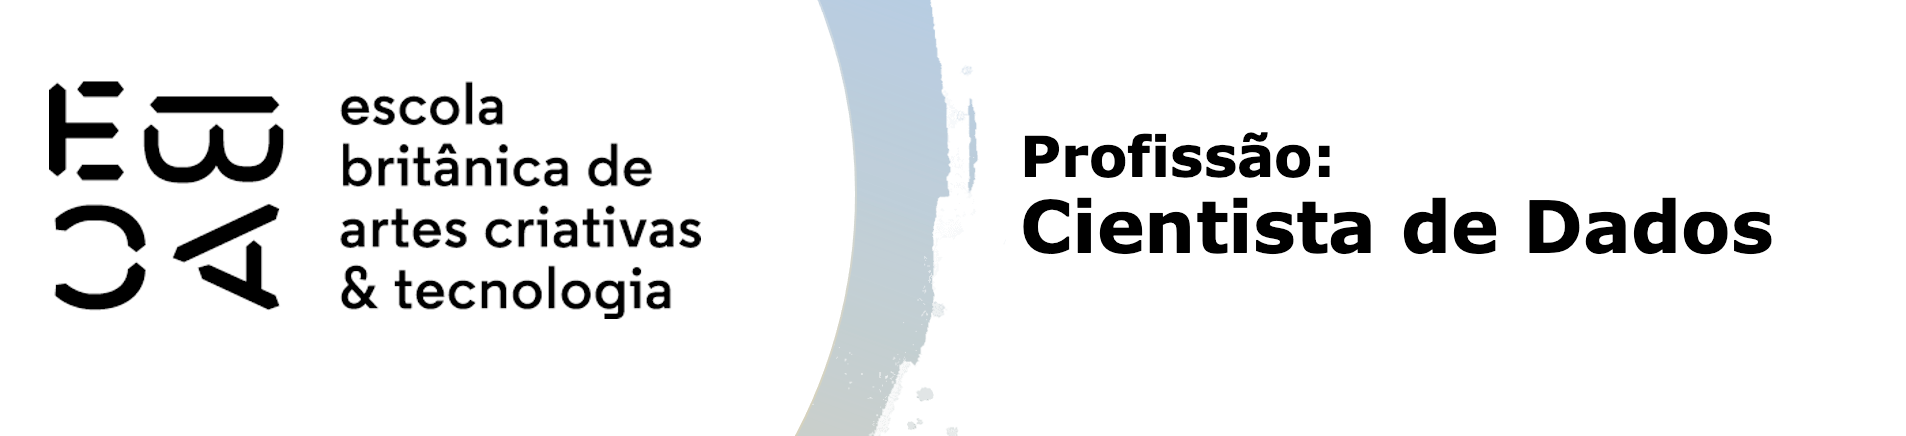

# Diagnóstico de Doença Cardíaca com Machine Learning

## Objetivo

A doença cardíaca é uma das principais causas de morte no mundo. Diagnósticos precoces e precisos podem salvar vidas e melhorar a qualidade de vida dos pacientes. O objetivo deste projeto é auxiliar profissionais de saúde no **diagnóstico precoce de doenças cardíacas** por meio de técnicas de aprendizado de máquina.

A base de dados utilizada neste projeto é proveniente do repositório UCI Machine Learning Repository, contendo informações clínicas e demográficas de pacientes. Com base nessas informações, pretende-se desenvolver um modelo capaz de prever a **presença ou ausência de doença cardíaca**.

Essa previsão pode ser uma ferramenta valiosa para:
- Apoiar decisões médicas;
- Identificar pacientes de alto risco;
- Direcionar exames e recursos de forma mais eficaz.

---

## Entendimento dos Dados

A base de dados contém **14 variáveis** coletadas de exames médicos e informações pessoais de pacientes. Cada linha representa um paciente, e cada coluna representa uma característica relevante para o diagnóstico.

### Dicionário de Dados

| Variável     | Descrição                                               | Tipo de Variável       |
|--------------|---------------------------------------------------------|-------------------------|
| `age`        | Idade do paciente                                       | Numérica contínua       |
| `sex`        | Sexo (1 = homem, 0 = mulher)                            | Binária categórica      |
| `cp`         | Tipo de dor no peito (0-3)                              | Categórica ordinal      |
| `trestbps`   | Pressão arterial em repouso (mm Hg)                     | Numérica contínua       |
| `chol`       | Colesterol sérico (mg/dl)                               | Numérica contínua       |
| `fbs`        | Glicose em jejum > 120 mg/dl (1 = sim, 0 = não)         | Binária                 |
| `restecg`    | Resultado do eletrocardiograma em repouso (0-2)         | Categórica ordinal      |
| `thalach`    | Frequência cardíaca máxima atingida                     | Numérica contínua       |
| `exang`      | Angina induzida por exercício (1 = sim, 0 = não)        | Binária                 |
| `oldpeak`    | Depressão do ST induzida por exercício                  | Numérica contínua       |
| `slope`      | Inclinação do ST no pico do exercício (0-2)             | Categórica ordinal      |
| `ca`         | Nº de vasos principais coloridos por fluoroscopia (0-4) | Categórica discreta     |
| `thal`       | Tipo de talassemia (1 = normal, 2 = fixo, 3 = reversível)| Categórica nominal      |
| `target`     | Indica presença de doença cardíaca (0 = não, 1 = sim)   | Binária (variável alvo) |


### Explicação das Variáveis Categóricas

#### **1. Tipo de dor no peito (`cp`)**
Representa o tipo de dor no peito que o paciente relata sentir.

| Valor de `cp` | Tipo de Dor no Peito                | Significado Clínico                                                                 |
|----------------|-------------------------------------|--------------------------------------------------------------------------------------|
| **0**          | **Angina típica**                  | Dor no peito típica de doença cardíaca, geralmente causada por esforço ou estresse.  |
| **1**          | **Angina atípica**                 | Dor no peito que não segue os padrões clássicos de angina.                          |
| **2**          | **Dor não anginosa**               | Dor no peito que provavelmente **não está relacionada ao coração**.                 |
| **3**          | **Assintomático**                  | **Sem dor no peito** — outros sintomas podem indicar doença cardíaca.               |

---

#### **2. Eletrocardiograma em repouso (`restecg`)**
Refere-se ao resultado do eletrocardiograma realizado enquanto o paciente está em repouso.

| Valor de `restecg` | Resultado do Eletrocardiograma   | Significado Clínico                                                          |
|--------------------|----------------------------------|-------------------------------------------------------------------------------|
| **0**              | **Normal**                       | Resultado normal do ECG em repouso.                                           |
| **1**              | **Anormalidade ST-T**            | Alterações no segmento ST ou na onda T, que podem indicar problemas cardíacos.|
| **2**              | **Hipertrofia ventricular esquerda** | Indica um aumento no tamanho do ventrículo esquerdo, comumente associado a doenças cardíacas. |

---

#### **3. Inclinação do segmento ST no pico do exercício (`slope`)**
Refere-se à inclinação do segmento ST após o exercício, medido no eletrocardiograma.

| Valor de `slope` | Inclinação do Segmento ST      | Significado Clínico                                                           |
|------------------|--------------------------------|--------------------------------------------------------------------------------|
| **0**            | **Descendente**                | Segmento ST com inclinação descendente, associado a maior risco de doença cardíaca.|
| **1**            | **Plana**                      | Segmento ST plano, que pode indicar um risco intermediário.                     |
| **2**            | **Ascendente**                 | Segmento ST com inclinação ascendente, geralmente considerado menos arriscado.  |

---

#### **4. Número de vasos principais coloridos por fluoroscopia (`ca`)**
Representa o número de vasos principais (coronários) que foram identificados como obstruídos durante o exame de fluoroscopia.

| Valor de `ca` | Número de Vasos Coloridos      | Significado Clínico                                                           |
|----------------|---------------------------------|--------------------------------------------------------------------------------|
| **0**          | **Nenhum vaso**                 | Nenhuma obstrução detectada nas artérias coronárias.                          |
| **1**          | **1 vaso**                      | Obstrução de um vaso coronário.                                               |
| **2**          | **2 vasos**                     | Obstrução de dois vasos coronários.                                           |
| **3**          | **3 vasos**                     | Obstrução de três vasos coronários.                                           |
| **4**          | **4 vasos**                     | Obstrução de quatro vasos coronários.                                         |

---

#### **5. Tipo de talassemia (`thal`)**
Refere-se ao tipo de talassemia do paciente, que pode estar relacionado com a presença de defeitos no sangue.

| Valor de `thal` | Tipo de Talassemia             | Significado Clínico                                                          |
|-----------------|---------------------------------|-------------------------------------------------------------------------------|
| **1**           | **Normal**                      | Paciente sem defeito na hemoglobina.                                          |
| **2**           | **Defeito Fixo**                | Paciente com defeito fixo na hemoglobina.                                     |
| **3**           | **Defeito Reversível**         | Paciente com defeito reversível na hemoglobina, que pode ser temporário.     |


## Carregando os pacotes

In [187]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from ydata_profiling import ProfileReport

import warnings
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")



## Carregando os dados

In [133]:
# url = "https://raw.githubusercontent.com/anshupandey/Machine-Learning-Using-Python/master/Datasets/heart.csv"
df = pd.read_csv('heart.csv')
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Entendimento dos dados - Univariada

In [136]:
prof = ProfileReport(df, explorative=True, minimal=False)
prof


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Entendimento dos dados - Bivariadas

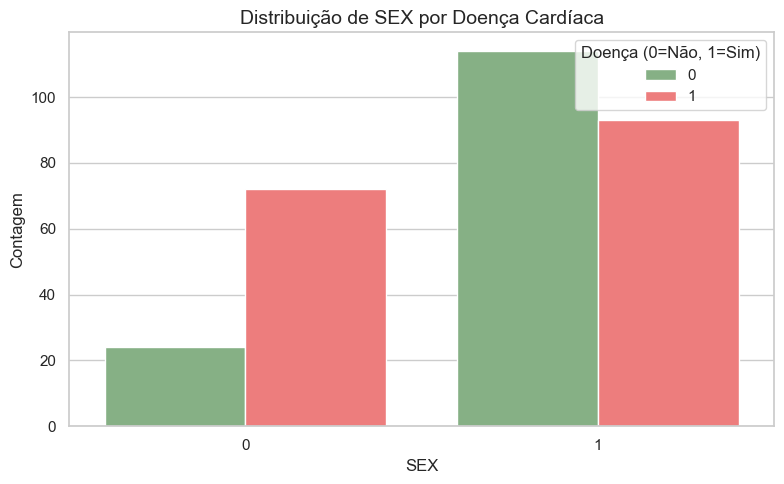

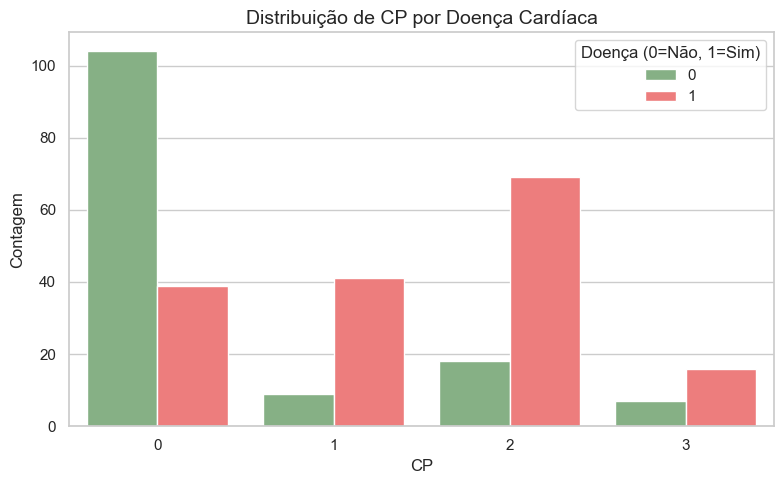

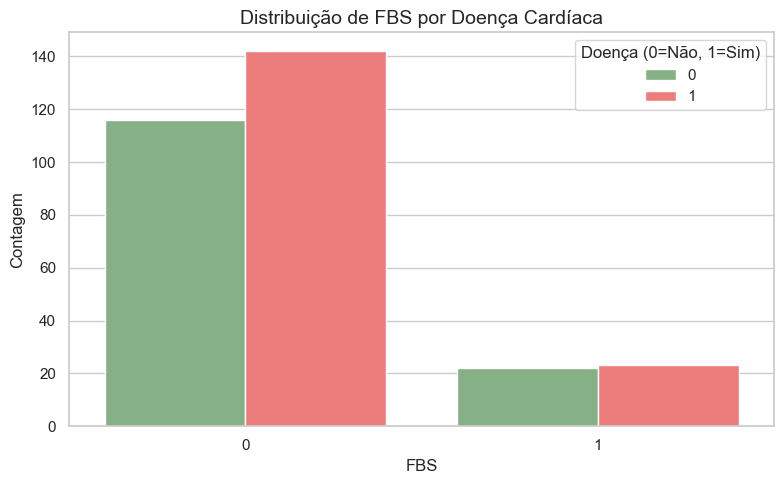

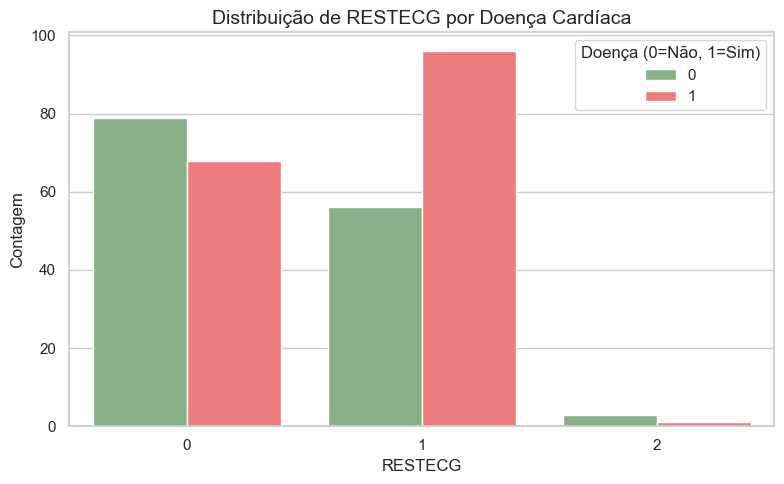

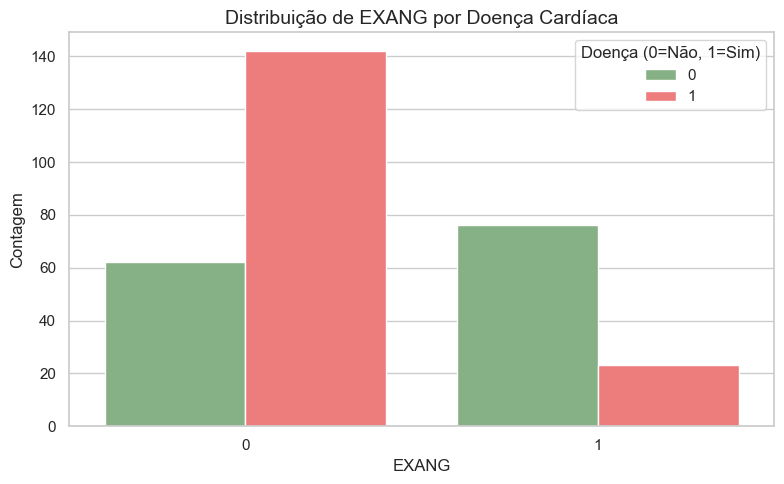

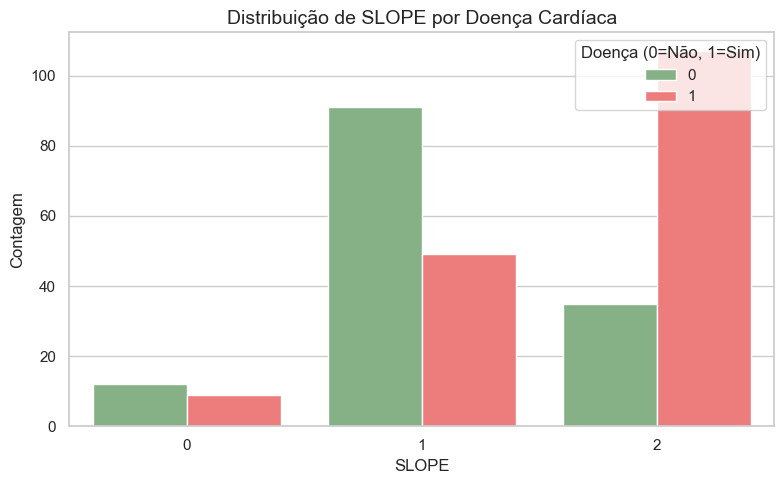

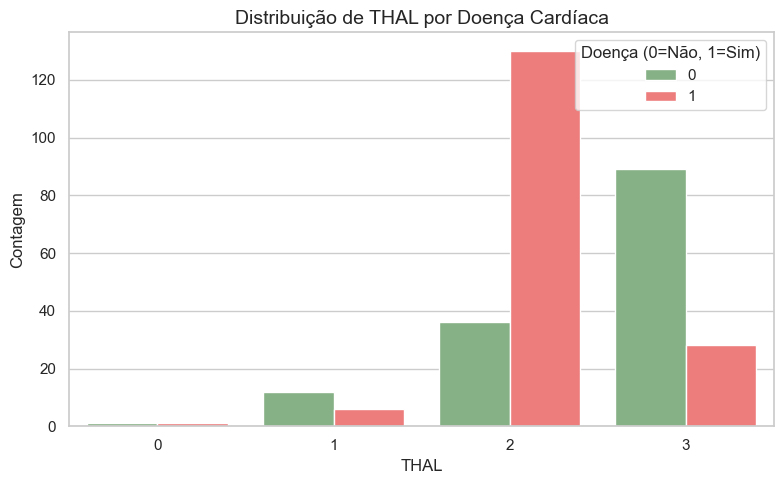

In [138]:
# Variáveis categóricas para visualizar
variaveis_categoricas = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

# Gráficos de barras (countplots)
for var in variaveis_categoricas:
    plt.figure(figsize=(8, 5))

    ax = sns.countplot(
        data=df,
        x=var,
        hue='target',
        palette={0: "#7FB77E", 1: "#FF6B6B"}
    )

    ax.set_title(f'Distribuição de {var.upper()} por Doença Cardíaca', fontsize=14)
    ax.set_xlabel(var.upper(), fontsize=12)
    ax.set_ylabel('Contagem', fontsize=12)
    plt.legend(title='Doença (0=Não, 1=Sim)', loc='upper right')

    plt.tight_layout()
    plt.show()


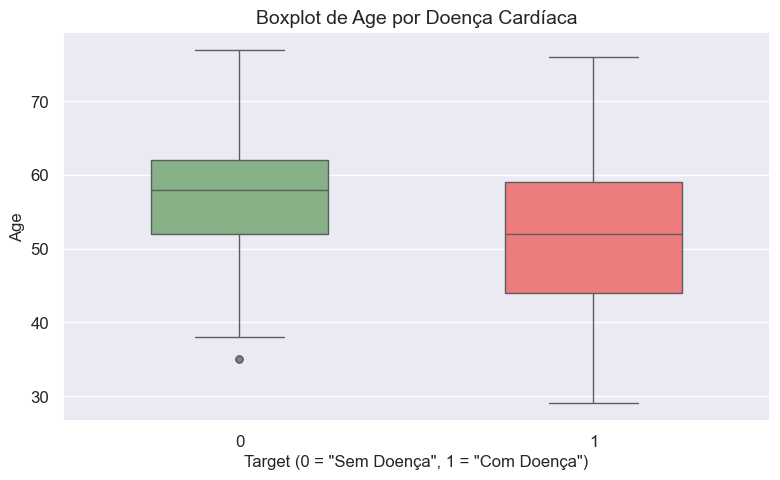

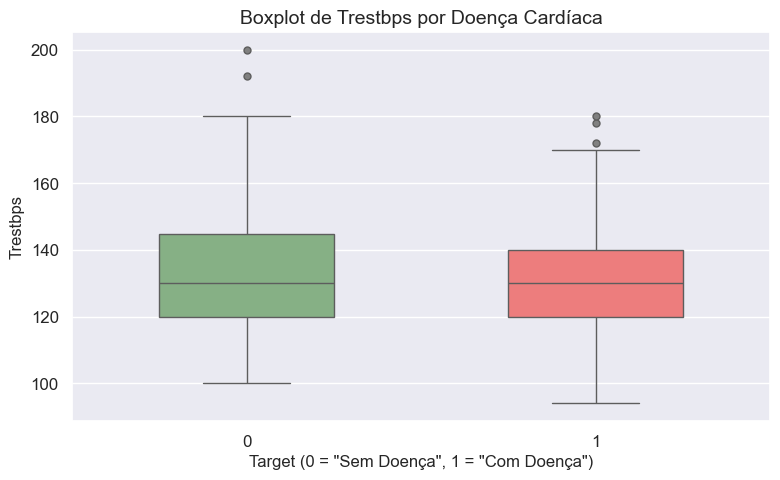

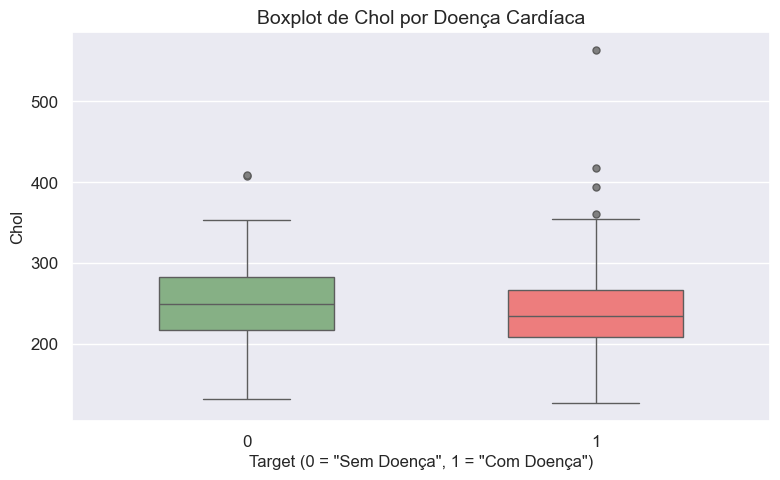

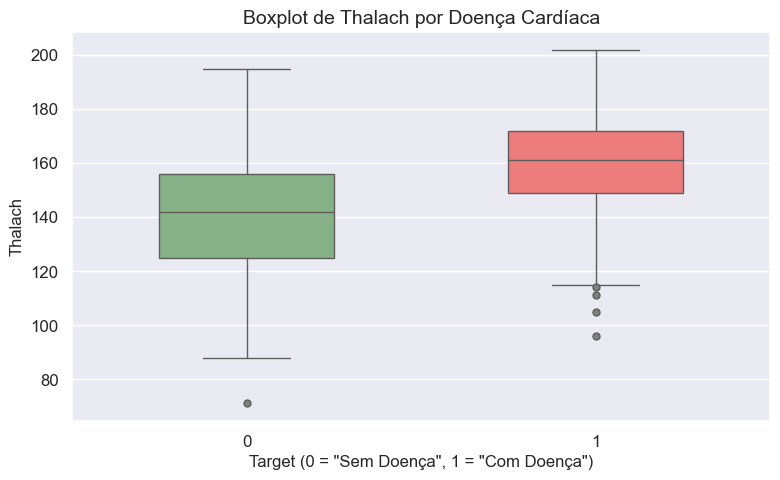

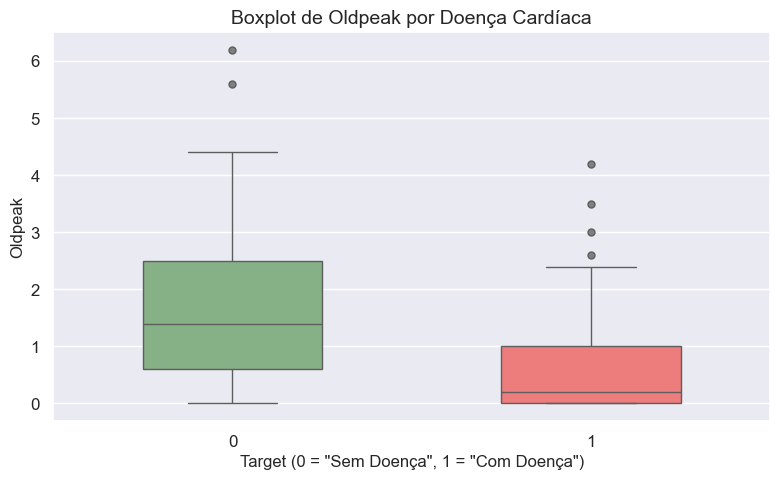

In [139]:
# Configuração do estilo dos gráficos
sns.set(style='darkgrid', palette='pastel', font_scale=1.1)

# Lista de variáveis numéricas para visualizar
variaveis_numericas = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Customização dos outliers nos boxplots
flierprops = dict(marker='o', markerfacecolor='gray', markersize=5, linestyle='none')

# Loop para gerar os boxplots
for var in variaveis_numericas:
    plt.figure(figsize=(8, 5))

    ax = sns.boxplot(
        data=df,
        x='target',
        y=var,
        hue='target',
        palette={0: "#7FB77E", 1: "#FF6B6B"},  # Verde para 0 (sem doença), vermelho para 1 (com doença)
        width=0.5,
        legend=False,
        flierprops=flierprops
    )

    ax.set_title(f'Boxplot de {var.capitalize()} por Doença Cardíaca', fontsize=14)
    ax.set_xlabel('Target (0 = "Sem Doença", 1 = "Com Doença")', fontsize=12)
    ax.set_ylabel(var.capitalize(), fontsize=12)

    plt.tight_layout()
    plt.show()


## Preparação dos dados

In [141]:
print("Formato:", df.shape)
print("\nTipos de dados:\n", df.dtypes)
print("\nValores ausentes:\n", df.isnull().sum())

df.describe()

Formato: (303, 14)

Tipos de dados:
 age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

Valores ausentes:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Remoção de linhas duplicadas

In [165]:
# Verificar linhas duplicadas
duplicated_rows = df[df.duplicated()]

# Exibir as linhas duplicadas
print(duplicated_rows)

num_duplicated = df.duplicated().sum()
print(f'Número de linhas duplicadas: {num_duplicated}')

# Remover linhas duplicadas
df = df.drop_duplicates()

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
164   38    1   2       138   175    0        1      173      0      0.0   

     slope  ca  thal  target  
164      2   4     2       1  
Número de linhas duplicadas: 1


### Remoção de Outliers

In [169]:
def IQR_Outliers(X, features, multiplier = 1):

    print('# of features: ', len(features))
    print('Features: ', features)

    indices = [x for x in X.index]
    #print(indices)
    print('Number of samples: ', len(indices))
    
    out_indexlist = []
        
    for col in features:
       
        #Using nanpercentile instead of percentile because of nan values
        Q1 = np.nanpercentile(X[col], 25.)
        Q3 = np.nanpercentile(X[col], 75.)
        
        cut_off = (Q3 - Q1) * 1.5
        upper, lower = (Q3 + cut_off)*multiplier, (Q1 - cut_off)
        print ('\nFeature: ', col)
        print ('Upper and Lower limits: ', upper, lower)
                
        outliers_index = X[col][(X[col] < lower) | (X[col] > upper)].index.tolist()
        outliers = X[col][(X[col] < lower) | (X[col] > upper)].values
        print('Number of outliers: ', len(outliers))
        if len(outliers) > 0:
            print('Outliers Min: ', min(outliers))
            print('Outliers Max: ', max(outliers))
        
        out_indexlist.extend(outliers_index)
        
    #using set to remove duplicates
    out_indexlist = list(set(out_indexlist))
    print('\nNumber of rows with outliers: ', len(out_indexlist))

    return out_indexlist

In [173]:
# Guardar os nomes das colunas
col = df.columns

index_outlier = IQR_Outliers(df, col, 4)

# of features:  13
Features:  Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')
Number of samples:  302

Feature:  age
Upper and Lower limits:  322.0 28.5
Number of outliers:  0

Feature:  sex
Upper and Lower limits:  10.0 -1.5
Number of outliers:  0

Feature:  cp
Upper and Lower limits:  20.0 -3.0
Number of outliers:  0

Feature:  trestbps
Upper and Lower limits:  680.0 90.0
Number of outliers:  0

Feature:  chol
Upper and Lower limits:  1481.5 115.375
Number of outliers:  0

Feature:  fbs
Upper and Lower limits:  0.0 0.0
Number of outliers:  45
Outliers Min:  1
Outliers Max:  1

Feature:  restecg
Upper and Lower limits:  10.0 -1.5
Number of outliers:  0

Feature:  thalach
Upper and Lower limits:  860.5 84.125
Number of outliers:  1
Outliers Min:  71
Outliers Max:  71

Feature:  exang
Upper and Lower limits:  10.0 -1.5
Number of outliers:  0

Feature:  oldpeak
Upper and Lower limits:  16

In [175]:
df = df.loc[np.setdiff1d(df.index,index_outlier)].copy()
df.shape

(255, 14)

In [200]:
# Pré-processamento
X = df.drop("target", axis=1)
y = df["target"]

# Normalização
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Divisão em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=415)


## Modelagem

In [68]:
# Modelagem e avaliação

models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n Modelo: {name}")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


 Modelo: Logistic Regression
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

Confusion Matrix:
 [[25  4]
 [ 5 27]]

 Modelo: KNN
              precision    recall  f1-score   support

           0       0.90      0.93      0.92        29
           1       0.94      0.91      0.92        32

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61

Confusion Matrix:
 [[27  2]
 [ 3 29]]

 Modelo: Random Forest
              precision    recall  f1-score   support

           0       0.89      0.83      0.86        29
           1       0.85      0.91      0.88        32

    accuracy                          

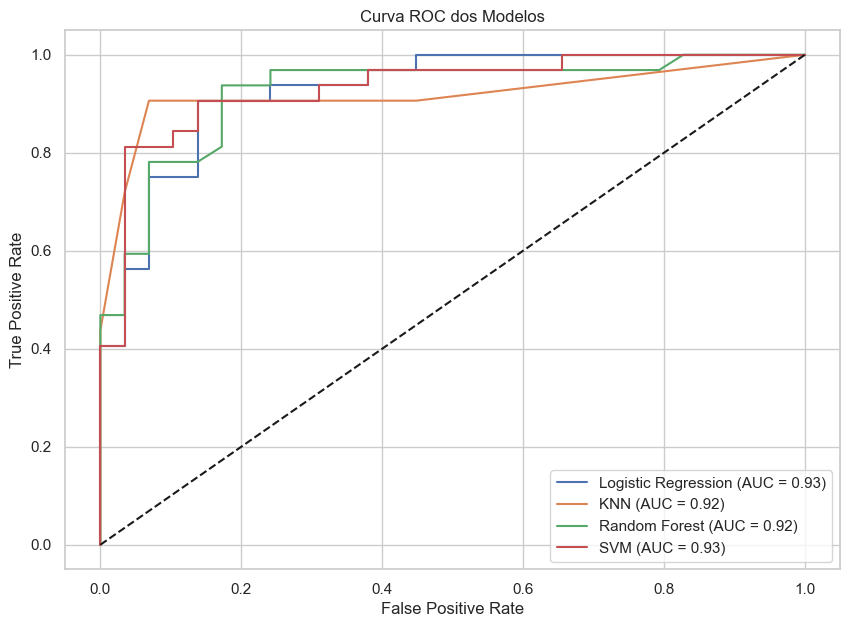

In [18]:
# Curva ROC para todos os modelos
plt.figure(figsize=(10, 7))

for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC dos Modelos")
plt.legend()
plt.show()


### Resumo das Comparações:

- **KNN** apresentou a melhor acurácia (92%), com bom equilíbrio entre precisão e recall, além de uma matriz de confusão com poucos erros (falsos positivos e negativos).

- **Logistic Regression** e **Random Forest** são modelos igualmente fortes, com boa performance e precisão, mas com alguns erros.

- **SVM** teve um desempenho similar ao **Random Forest**, mas com um recall ligeiramente menor, o que pode significar que ele perde alguns casos positivos (pacientes com doença cardíaca).

#### Objetivos:
- Se o objetivo for **minimizar a quantidade de falsos negativos** (pacientes com a doença que não são detectados), o modelo **KNN** parece ser o melhor, seguido de perto pela **Logistic Regression**.
- Se o objetivo for **minimizar falsos positivos** (diagnóstico errado de doença), o **KNN** também se destaca.

#### Conclusão:
Em resumo, **KNN** se saiu melhor de todos os modelos, mas a escolha do modelo ideal pode depender de qual tipo de erro você deseja minimizar (falsos positivos ou falsos negativos).

